In [1]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files

uploaded = files.upload()


Saving heart.csv to heart.csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['heart.csv']))
print(df)

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  

In [4]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [7]:
df.duplicated().sum()

1

In [8]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [13]:
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

In [14]:
x = df.drop('output',axis=1)  # x is independent feature
y = df['output']              # y is dependent feature
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(303, 13)
(303,)


In [15]:
x.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [17]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
print(x.shape)
print(y.shape)
print(303*0.25)
print(303-76)

(303, 13)
(303,)
75.75
227


In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(227, 13)
(76, 13)
(227,)
(76,)


In [21]:
import tensorflow as tf

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [26]:
m1 = Sequential()
m1.add(Dense(52,activation='relu',input_dim=13))    # input layers has 8 neurons, H1 has 40 neurons
m1.add(Dense(39,activation='relu'))                # H2 has 20 neurons
m1.add(Dense(13,activation='relu'))                 # H3 has 8 neurons
m1.add(Dense(1,activation='sigmoid'))              # Output Layer has 1 neuron

m1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [27]:
h1 = m1.fit(x_train,y_train,epochs=30,validation_data=(x_test,y_test))

Epoch 1/30
8/8 [==============================] - 1s 34ms/step - loss: 2.4152 - accuracy: 0.4626 - val_loss: 1.2865 - val_accuracy: 0.5395
Epoch 2/30
8/8 [==============================] - 0s 9ms/step - loss: 0.9144 - accuracy: 0.5374 - val_loss: 0.6721 - val_accuracy: 0.6053
Epoch 3/30
8/8 [==============================] - 0s 7ms/step - loss: 0.6719 - accuracy: 0.5815 - val_loss: 0.6523 - val_accuracy: 0.6447
Epoch 4/30
8/8 [==============================] - 0s 7ms/step - loss: 0.6698 - accuracy: 0.5595 - val_loss: 0.6563 - val_accuracy: 0.6711
Epoch 5/30
8/8 [==============================] - 0s 9ms/step - loss: 0.6669 - accuracy: 0.6167 - val_loss: 0.6484 - val_accuracy: 0.6184
Epoch 6/30
8/8 [==============================] - 0s 7ms/step - loss: 0.6594 - accuracy: 0.6344 - val_loss: 0.6501 - val_accuracy: 0.6711
Epoch 7/30
8/8 [==============================] - 0s 8ms/step - loss: 0.6490 - accuracy: 0.6256 - val_loss: 0.6441 - val_accuracy: 0.6842
Epoch 8/30
8/8 [=================

In [28]:
r1 = pd.DataFrame(h1.history)
r1['Epochs'] = h1.epoch
r1.tail()

,loss,accuracy,val_loss,val_accuracy,Epochs
25,0.598906,0.665198,0.531133,0.789474,25
26,0.601237,0.669604,0.536758,0.750000,26
27,0.613856,0.647577,0.523747,0.776316,27
28,0.602871,0.660793,0.524100,0.789474,28
29,0.592814,0.682819,0.515457,0.802632,29


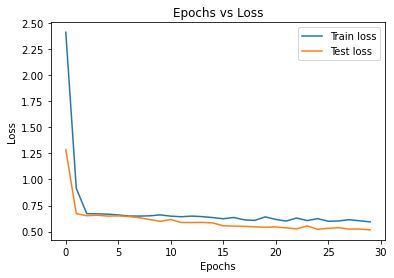

In [29]:
plt.plot(r1['Epochs'],r1['loss'],label='Train loss')
plt.plot(r1['Epochs'],r1['val_loss'],label='Test loss')
plt.title('Epochs vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

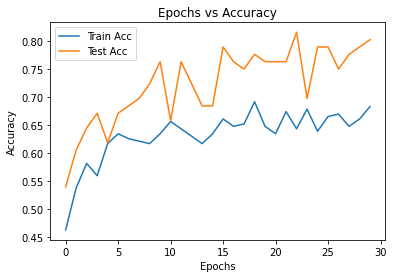

In [30]:
plt.plot(r1['Epochs'],r1['accuracy'],label='Train Acc')
plt.plot(r1['Epochs'],r1['val_accuracy'],label='Test Acc')
plt.title('Epochs vs Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [31]:
ypred = m1.predict(x_test)
print(len(ypred))
print(ypred[:10])

3/3 [==============================] - 0s 4ms/step
76
[[0.23453109]
 [0.49004763]
 [0.7261484 ]
 [0.41984546]
 [0.4956152 ]
 [0.7364637 ]
 [0.65912294]
 [0.16187291]
 [0.33607098]
 [0.6044831 ]]


In [32]:
ypred_m1 = [1 if i>0.5 else 0 for i in ypred]
print(ypred_m1)

[0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1]


In [33]:
from sklearn.metrics import confusion_matrix, classification_report

In [34]:
cm = confusion_matrix(y_test,ypred_m1)
print(cm)
print(classification_report(y_test,ypred_m1))

[[25 10]
 [ 5 36]]
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        35
           1       0.78      0.88      0.83        41

    accuracy                           0.80        76
   macro avg       0.81      0.80      0.80        76
weighted avg       0.81      0.80      0.80        76



In [35]:
print(cm)

[[25 10]
 [ 5 36]]


In [36]:
acc = (36+25)/(25+10+5+36)
print(acc)

0.8026315789473685


In [37]:
pre0 = 25/(25+5)
pre1 = 36/(36+10)
print('Pre0',pre0,'Pre1',pre1)
rec0 = 25/(25+10)
rec1 = 36/(36+5)
print('Rec0',rec0,'Rec1',rec1)

Pre0 0.8333333333333334 Pre1 0.782608695652174
Rec0 0.7142857142857143 Rec1 0.8780487804878049


In [38]:
f1s0 = 2*pre0*rec0/(pre0+rec0)
f1s1 = 2*pre1*rec1/(pre1+rec1)
print('F1Scr0',f1s0)
print('F1Scr1',f1s1)

F1Scr0 0.7692307692307692
F1Scr1 0.8275862068965518
